<a href="https://colab.research.google.com/github/dbckz/crossing-the-line/blob/master/notebooks/processing_full_perspective_world_cup_230323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import pandas as pd
import ast
import os
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm
from google.colab import drive
import plotly.graph_objects as go

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set up paths
root_path = "/content/drive/MyDrive/University/Dissertation/world_cup_data"
graph_path = root_path + "/graphs"

day_paths = day_paths = [
        "/1",
        "/2",
        "/291122",
        "/301122",
        "/011222",
        "/021222",
        "/031222",
        "/041222",
        "/051222",
        "/061222",
        "/071222",
        "/081222",
        "/091222",
        "/101222",
        "/111222",
        "/121222",
        "/131222",
        "/141222",
        "/151222",
        "/161222",
        "/171222",
        "/181222",
        "/191222"
    ]

In [4]:
# Create directory to store visualisations
try:
    os.mkdir(graph_path)
except OSError as error:
    print(error)

[Errno 17] File exists: '/content/drive/MyDrive/University/Dissertation/world_cup_data/graphs'


In [5]:
# Load data
in_tweets = pd.DataFrame()
persp = pd.DataFrame()
emojis = pd.DataFrame()
for path in day_paths:
    directory = root_path + path
    tweets_csv = directory + "/tweets.csv"
    persp_csv = directory + "/perspective_processed_tweets.csv"
    emojis_csv = directory + "/emoji.csv"

    print(f"Loading CSVs for directory {path}...")
    in_tweets = pd.concat([in_tweets, 
                           pd.read_csv(tweets_csv,
                                       usecols = [
                                                  'created_at',
                                                  'tweet_id',
                                                  'tweet_text',
                                                  'accounts_mentioned'
                                       ],
                                       dtype = {
                                          # 'created_at':
                                          'tweet_id': np.int64,
                                          'tweet_text': str,
                                          'accounts_mentioned': object
                                       },
                                       parse_dates=['created_at'])])

    persp = pd.concat([persp, pd.read_csv(persp_csv,
                                          usecols = [
                                                      'tweet_id',
                                                      'identity_attack_score',
                                                      'threat_score',
                                                      'severe_toxicity_score',
                                                      'insult_score'
                                                      
                                          ],
                                          dtype = {
                                              'tweet_id': np.int64,
                                              'identity_attack_score': float,
                                              'threat_score': float,
                                              'severe_toxicity_score': float,
                                              'insult_score': float
                                          })])

# Dedup
original_tweets_length = len(in_tweets)
original_persp_length = len(persp)
in_tweets.drop_duplicates(subset=['tweet_id'], inplace=True)
persp.drop_duplicates(subset=['tweet_id'], inplace=True)
print(f"Size of tweets dataframe: {len(in_tweets)}, having dropped {original_tweets_length - len(in_tweets)} duplicate rows")
print(f"Size of perspective dataframe: {len(persp)}, having dropped {original_persp_length - len(persp)} duplicate rows")


Loading CSVs for directory /1...
Loading CSVs for directory /2...
Loading CSVs for directory /291122...
Loading CSVs for directory /301122...
Loading CSVs for directory /011222...
Loading CSVs for directory /021222...
Loading CSVs for directory /031222...
Loading CSVs for directory /041222...
Loading CSVs for directory /051222...
Loading CSVs for directory /061222...
Loading CSVs for directory /071222...
Loading CSVs for directory /081222...
Loading CSVs for directory /091222...
Loading CSVs for directory /101222...
Loading CSVs for directory /111222...
Loading CSVs for directory /121222...
Loading CSVs for directory /131222...
Loading CSVs for directory /141222...
Loading CSVs for directory /151222...
Loading CSVs for directory /161222...
Loading CSVs for directory /171222...
Loading CSVs for directory /181222...
Loading CSVs for directory /191222...
Size of tweets dataframe: 347242, having dropped 7805 duplicate rows
Size of perspective dataframe: 347242, having dropped 7828 duplicat

In [6]:
# Up the pandas display limits so printed dataframes aren't so truncated
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_info_columns', 100)
pd.set_option('display.precision', 9)

In [7]:
# Join tables + drop old ones!
joined_df = pd.merge(in_tweets, persp, how='inner', on='tweet_id')
del persp
del in_tweets
len(joined_df)

347242

In [8]:
joined_df = joined_df[(joined_df['created_at'] > '2022-11-28 00:00:00+00:00') & (joined_df['created_at'] < '2022-12-16 00:00:00+00:00')]
len(joined_df)

190639

# Analysis

In [9]:
print(f"Number of tweets that Perspective could not process: {len(joined_df[joined_df['identity_attack_score'] == -1.0])}") # might need to do this later...

Number of tweets that Perspective could not process: 8140


In [10]:
# Extract players
list_of_players = ["JPickford1", "kylewalker2", "LukeShaw23", "_DeclanRice",
                   "HarryMaguire93", "JackGrealish", "JHenderson", "HKane", 
                   "sterling7", "MarcusRashford", "trippier2",
                   "PhilFoden", "ben6white", "BukayoSaka87", "BellinghamJude", 
                   "Popey1992", "AaronRamsdale98", "CallumWilson", "TrentAA", 
                   "Madders10", "ericdier", "Kalvinphillips"]


for player in list_of_players:
    print(f"Extracting {player}...")
    joined_df[player] = joined_df['accounts_mentioned'].str.contains(f"'username': '{player}'").astype(bool)



Extracting JPickford1...
Extracting kylewalker2...
Extracting LukeShaw23...
Extracting _DeclanRice...
Extracting HarryMaguire93...
Extracting JackGrealish...
Extracting JHenderson...
Extracting HKane...
Extracting sterling7...
Extracting MarcusRashford...
Extracting trippier2...
Extracting PhilFoden...
Extracting ben6white...
Extracting BukayoSaka87...
Extracting BellinghamJude...
Extracting Popey1992...
Extracting AaronRamsdale98...
Extracting CallumWilson...
Extracting TrentAA...
Extracting Madders10...
Extracting ericdier...
Extracting Kalvinphillips...


In [11]:
joined_df = joined_df[
    (joined_df["JPickford1"]) |
    (joined_df["kylewalker2"]) |
    (joined_df["LukeShaw23"]) |
    (joined_df["_DeclanRice"]) |
    (joined_df["HarryMaguire93"]) |
    (joined_df["JackGrealish"]) |
    (joined_df["JHenderson"]) |
    (joined_df["HKane"]) |
    (joined_df["sterling7"]) |
    (joined_df["MarcusRashford"]) |
    (joined_df["trippier2"]) |
    (joined_df["Kalvinphillips"]) |
    (joined_df["PhilFoden"]) |
    (joined_df["ben6white"]) |
    (joined_df["Popey1992"]) |
    (joined_df["AaronRamsdale98"]) |
    (joined_df["CallumWilson"]) |
    (joined_df["TrentAA"]) |
    (joined_df["Madders10"]) |
    (joined_df["ericdier"]) |
    (joined_df["BukayoSaka87"]) |
    (joined_df["BellinghamJude"])
    ]

In [12]:
print(len(joined_df))

179779


array([[<Axes: title={'center': 'identity_attack_score'}>]], dtype=object)

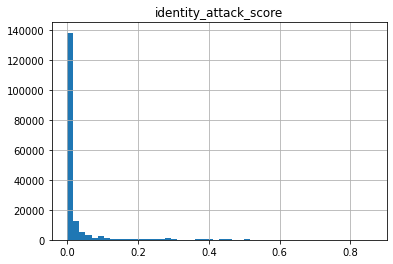

In [13]:
joined_df[joined_df['identity_attack_score'] != -1.0].hist(column = 'identity_attack_score', bins=50)

array([[<Axes: title={'center': 'threat_score'}>]], dtype=object)

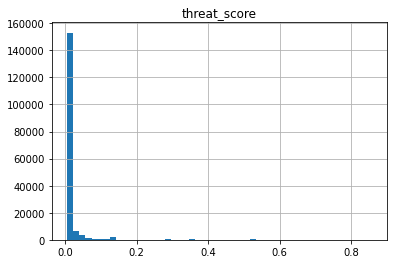

In [14]:
joined_df[joined_df['threat_score'] != -1.0].hist(column = 'threat_score', bins=50)

array([[<Axes: title={'center': 'severe_toxicity_score'}>]], dtype=object)

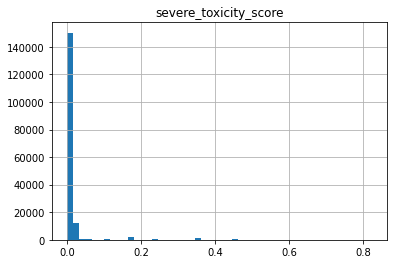

In [15]:
joined_df[joined_df['severe_toxicity_score'] != -1.0].hist(column = 'severe_toxicity_score', bins=50)

array([[<Axes: title={'center': 'insult_score'}>]], dtype=object)

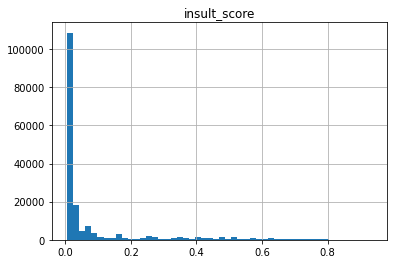

In [16]:
joined_df[joined_df['insult_score'] != -1.0].hist(column = 'insult_score', bins=50)

In [17]:
len_total = len(joined_df)
threshold = 0.5

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.9], joined_df[joined_df['threat_score'] > 0.9], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.9], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.9], how='outer', on='tweet_id')
len_90 = len(tmp)
print(f"Tweets with scores > 0.9: {len_90}, which is {(100 * (len_90 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.8], joined_df[joined_df['threat_score'] > 0.8], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.8], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.8], how='outer', on='tweet_id')
len_80 = len(tmp)
print(f"Tweets with scores > 0.8: {len_80}, which is {(100 * (len_80 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.7], joined_df[joined_df['threat_score'] > 0.7], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.7], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.7], how='outer', on='tweet_id')
len_70 = len(tmp)
print(f"Tweets with scores > 0.7: {len_70}, which is {(100 * (len_70 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.6], joined_df[joined_df['threat_score'] > 0.6], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.6], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.6], how='outer', on='tweet_id')
len_60 = len(tmp)
print(f"Tweets with scores > 0.6: {len_60}, which is {(100 * (len_60 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.5], joined_df[joined_df['threat_score'] > 0.5], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.5], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.5], how='outer', on='tweet_id')
len_50 = len(tmp)
print(f"Tweets with scores > 0.5: {len_50}, which is {(100 * (len_50 / len_total)):.2f}% of all tweets")

joined_df['persp_over_threshold'] = (joined_df['identity_attack_score'] > threshold) | (joined_df['threat_score'] > threshold) | (joined_df['severe_toxicity_score'] > threshold)
                                                                                 
del tmp


Tweets with scores > 0.9: 0, which is 0.00% of all tweets
Tweets with scores > 0.8: 6, which is 0.00% of all tweets
Tweets with scores > 0.7: 50, which is 0.03% of all tweets
Tweets with scores > 0.6: 461, which is 0.26% of all tweets
Tweets with scores > 0.5: 1751, which is 0.97% of all tweets


In [18]:
# Maybe we don't need these cols and we can just calculate ad-hoc?
for player in list_of_players:
    joined_df[f'{player}_offensive'] = joined_df['persp_over_threshold'] & joined_df[player]

In [19]:
player_offensive_tweet_map = pd.DataFrame(columns=["username",
                                                   "tweets_received",
                                                   "offensive_tweets_received",
                                                   "percentage_offensive"
                                                   ])

i = 0
for player in list_of_players:
    off_tweets = joined_df[player + '_offensive'].sum()
    tweets = joined_df[player].sum()
    percentage = 100 * (off_tweets / tweets)
    player_offensive_tweet_map.loc[i] = player, tweets, off_tweets, percentage
    i += 1

In [20]:
name_map = {
    "JPickford1": "Jordan Pickford",
    "Popey1992": "Nick Pope",
    "kylewalker2": "Kyle Walker",
    "Kalvinphillips": "Kalvin Phillips",
    "ben6white": "Benjamin White",
    "ericdier": "Eric Dier",
    "trippier2": "Kieran Trippier",
    "TrentAA": "Trent Alexander-Arnold",
    "AaronRamsdale98": "Aaron Ramsdale",
    "JHenderson": "Jordan Henderson",
    "PhilFoden": "Phil Foden",
    "CallumWilson": "Callum Wilson",
    "sterling7": "Raheem Sterling",
    "LukeShaw23": "Luke Shaw",
    "_DeclanRice": "Declan Rice",
    "Madders10": "James Maddison",
    "BellinghamJude": "Jude Bellingham",
    "JackGrealish": "Jack Grealish",
    "HarryMaguire93": "Harry Maguire",
    "MarcusRashford": "Marcus Rashford",
    "BukayoSaka87": "Bukayo Saka",
    "HKane": "Harry Kane"
}

player_offensive_tweet_map["player"] = player_offensive_tweet_map["username"].map(name_map)


In [40]:
player_offensive_tweet_map.sort_values('offensive_tweets_received', axis=0, ascending=True, inplace=True)
offensive_tweets_all = joined_df['persp_over_threshold'].sum()
offensive_tweets_top_10 = player_offensive_tweet_map['offensive_tweets_received'].head(10).sum()
top_10_proportion = offensive_tweets_top_10 / offensive_tweets_all
print(f"Total offensive tweets: {offensive_tweets_all}")
print(f"Top 10 proportion: {top_10_proportion * 100}%")

print(player_offensive_tweet_map[['player','username', 'offensive_tweets_received']])

Total offensive tweets: 1751
Top 10 proportion: 5.139920045688178%
                    player         username  offensive_tweets_received
15               Nick Pope        Popey1992                          0
20               Eric Dier         ericdier                          3
10         Kieran Trippier        trippier2                          4
17           Callum Wilson     CallumWilson                          4
21         Kalvin Phillips   Kalvinphillips                          5
16          Aaron Ramsdale  AaronRamsdale98                          8
2                Luke Shaw       LukeShaw23                         14
0          Jordan Pickford       JPickford1                         15
19          James Maddison        Madders10                         18
12          Benjamin White        ben6white                         19
1              Kyle Walker      kylewalker2                         23
18  Trent Alexander-Arnold          TrentAA                         34
11        

In [37]:
player_offensive_tweet_map['offensive_tweets_received'].sum()

1957

In [22]:
# Saving a file for manual review, taken at threshold 90 - one-off ad-hoc task
# joined_df[['tweet_id', 'tweet_text']][joined_df['persp_over_threshold'] == True].to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/tweets_persp.csv", index=False)

# joined_df[['tweet_id', 'tweet_text']][joined_df['persp_over_threshold'] == False].sample(1000).to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/inoffensive.csv", index=False)

In [23]:
# Write to file in prep for regression
tweets_regression_file = root_path + "/regression_tweets.csv"
joined_df.to_csv(tweets_regression_file, index=False)

In [24]:
player_offensive_tweet_map.tail()

,username,tweets_received,offensive_tweets_received,percentage_offensive,player
4,HarryMaguire93,12004,83,0.691436188,Harry Maguire
13,BukayoSaka87,12253,111,0.905900596,Bukayo Saka
9,MarcusRashford,30098,219,0.727623098,Marcus Rashford
14,BellinghamJude,31430,165,0.524976137,Jude Bellingham
7,HKane,55642,947,1.701951763,Harry Kane


In [41]:
fig = go.Figure(data=[
    go.Bar(name='offensive', y=player_offensive_tweet_map.player, x=player_offensive_tweet_map.offensive_tweets_received, marker_color = "darkred", orientation = 'h'),
    go.Bar(name='total', y=player_offensive_tweet_map.player, x=player_offensive_tweet_map.tweets_received, marker_color="lightgrey", orientation = 'h')
])
# Change the bar mode
fig.update_layout(barmode='stack')

fig.show()

In [42]:
fig = go.Figure(data=[
    go.Bar(name='offensive', y=player_offensive_tweet_map.sort_values('offensive_tweets_received', axis=0, ascending=True, inplace=False).player, x=player_offensive_tweet_map.sort_values('offensive_tweets_received', axis=0, ascending=True, inplace=False).offensive_tweets_received, marker_color = "darkred", orientation = 'h')
])
# Change the bar mode


fig.show()

In [49]:
fig = go.Figure(data=[
    go.Bar(name='offensive', y=player_offensive_tweet_map.player, x=player_offensive_tweet_map.offensive_tweets_received, marker_color = "darkred", orientation = 'h'),
    go.Bar(name='total', y=player_offensive_tweet_map.player, x=player_offensive_tweet_map.tweets_received, marker_color="lightgrey", orientation = 'h')
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.update_xaxes(type="log", tickvals=[0, 10, 100, 1000, 10000], ticktext=['1', '10', '100', '1k', '10k'])

fig.show()
fig.write_html("/content/drive/MyDrive/University/Dissertation/images/world_cup_by_player.html", include_plotlyjs='cdn')

# Figures

In [28]:
def create_frequency_plot(df, y_values):
    fig = go.Figure()
    for y_value in y_values:
        fig.add_trace(go.Scatter(x=df['created_at'], y=df[y_value],
                      mode='lines',
                      name=y_value))
    return fig

In [29]:
INTERVAL = pd.offsets.Minute(60)

In [30]:
# Plot all tweets frequency
df = joined_df.resample(INTERVAL, on='created_at')['tweet_id'].count().reset_index()
fig = create_frequency_plot(df, ['tweet_id'])
fig.show()

In [31]:
# Plot Sterling, Rashford, Kane tweet frequency
df = joined_df.resample(INTERVAL, on='created_at')['MarcusRashford', 'BellinghamJude', 'HKane'].sum().reset_index()
fig = create_frequency_plot(df, ['MarcusRashford', 'BellinghamJude', 'HKane'])
fig.show()

In [35]:
# Plot frequency of offensive tweets
df = joined_df.resample(INTERVAL, on='created_at')['persp_over_threshold'].sum().reset_index()
fig = create_frequency_plot(df, ['persp_over_threshold'])
fig.update_layout(xaxis_tickmode='linear', xaxis_dtick='D1', xaxis_tickangle=90)
fig.show()
fig.write_html("/content/drive/MyDrive/University/Dissertation/images/world_cup_offensive_tweet_plot.html", include_plotlyjs='cdn')

In [33]:
# Plot Sterling, Rashford, Kane tweet frequency
df = joined_df.resample(INTERVAL, on='created_at')['MarcusRashford_offensive', 'BellinghamJude_offensive', 'HKane_offensive'].sum().reset_index()
fig = create_frequency_plot(df, ['MarcusRashford_offensive', 'BellinghamJude_offensive', 'HKane_offensive'])
fig.show()